In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from sklearn.metrics import f1_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import numpy as np

from data import *
from helpers import *


In [2]:
# Automated way to create labeled dataset
#directory='/../data_gated/'
#columns=['FSC-H', 'SSC-H', 'B530-H', 'B572-H', 'B675-H']
#create_labeled_dataset(directory,columns)

In [3]:
directory='/../data_gated/'
fileName='all_event/GL53_UP_2A.fcs'
data = load_file(fileName, directory)

In [4]:
data_df = pd.DataFrame(data=data, columns=data.channels)

In [5]:
data_df.shape

(1898, 12)

In [6]:
data_df.describe()

,FSC-H,SSC-H,B530-H,B572-H,B675-H,FSC-A,SSC-A,B530-A,B572-A,B675-A,Width,Time
count,1898.000000,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.0
mean,11261.881836,3.955664e+04,14137.167969,4196.788086,4326.112305,2924.793945,10294.613281,1.677182e+04,4987.258789,5029.241211,23.807034,60493772.0
std,31326.855469,7.075362e+04,30667.376953,7709.301758,7171.506348,8722.607422,19255.326172,3.998809e+04,10251.704102,9624.669922,6.706486,33297648.0
min,503.000000,0.000000e+00,3001.000000,360.000000,57.000000,27.000000,-671.000000,1.814000e+03,372.000000,109.000000,11.750000,175251.0
25%,1723.250000,9.890500e+03,4327.250000,1796.250000,1915.500000,385.500000,2320.500000,4.383000e+03,1914.000000,2059.500000,18.625000,31943201.0
50%,3937.500000,2.025350e+04,6724.500000,2857.000000,3130.000000,957.000000,5152.000000,7.371000e+03,3200.000000,3470.000000,22.750000,60990022.0
75%,10126.500000,4.281850e+04,13113.500000,4480.750000,5134.750000,2563.000000,11005.500000,1.524675e+04,5245.500000,5724.750000,27.750000,88792496.0
max,529406.000000,1.186901e+06,873270.000000,252727.000000,213873.000000,174884.000000,306065.000000,1.175428e+06,344178.000000,297353.000000,74.375000,118892952.0


In [7]:
# Summary of index, datatypes and non-null values of each column 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FSC-H   1898 non-null   float32
 1   SSC-H   1898 non-null   float32
 2   B530-H  1898 non-null   float32
 3   B572-H  1898 non-null   float32
 4   B675-H  1898 non-null   float32
 5   FSC-A   1898 non-null   float32
 6   SSC-A   1898 non-null   float32
 7   B530-A  1898 non-null   float32
 8   B572-A  1898 non-null   float32
 9   B675-A  1898 non-null   float32
 10  Width   1898 non-null   float32
 11  Time    1898 non-null   float32
dtypes: float32(12)
memory usage: 89.1 KB


In [8]:
# Number of unique values in each column
print(data_df.nunique())

FSC-H     1727
SSC-H     1869
B530-H    1735
B572-H    1628
B675-H    1698
FSC-A     1399
SSC-A     1790
B530-A    1786
B572-A    1671
B675-A    1691
Width      227
Time      1898
dtype: int64


### negative values

In [9]:
columns=['FSC-H','SSC-H','B530-H','B572-H','B675-H','FSC-A','SSC-A','B530-A','B572-A','B675-A','Width']

files = [
         '../labeled_dataset/GL53_UP_1A.csv',
         '../labeled_dataset/GL53_UP_2A.csv',
         '../labeled_dataset/GL53_UP_3A.csv',
         '../GL55_DN_3A.csv',
         '../labeled_dataset/GL57_DN_3A.csv',
         '../labeled_dataset/GL57_DN_2A.csv',
         '../labeled_dataset/GL58_UP_1A.csv',
         '../labeled_dataset/GL58_UP_2A.csv',
         '../labeled_dataset/GL58_UP_3A.csv',
         '../labeled_dataset/GL59_DN_1A.csv',
         '../labeled_dataset/GL59_DN_2A.csv',
         '../labeled_dataset/GL59_DN_3A.csv']

for file in files:
    #print(file)
    df_labeled = pd.read_csv(file)

    #creation of X and y
    df_labeled,y = split_input_output(df_labeled,target_feature='label')
    df_labeled = df_labeled[columns]

    #Index of all values strictly positive (because we will apply log() to all our data for standardization)
    na_indexes = (df_labeled <= 0).all(1)
    X_neg = df_labeled[na_indexes] 
    print(X_neg.shape)

#Standardize our data
#X = X[na_indexes]
#y = y[na_indexes]
#X = np.log(X)


(0, 11)
(0, 11)
(0, 11)
(0, 11)
(0, 11)
(0, 11)
(0, 11)
(0, 11)
(0, 11)
(0, 11)
(0, 11)
(0, 11)


## Feature selection



## Feature importance


https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [27]:
#Files
file = '../labeled_dataset/GL53_UP_2A.csv'
columns=['FSC-H','SSC-H','B530-H','B572-H','B675-H','FSC-A','SSC-A','B530-A','B572-A','B675-A','Width']
X,y = preprocess(file,columns)
#X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train, X_test, y_train, y_test = proportional_train_test_split(X,y)

In [28]:
feature_names = [f'{X.columns[i]}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [29]:
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)

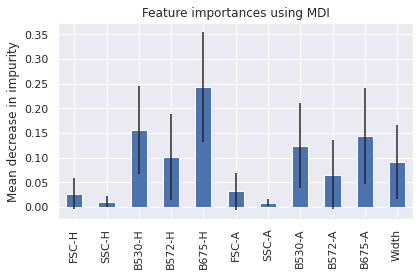

In [30]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

We train a Random Forest Classifier to then obtain the feature importances of our features provided by the attribute feature_importances_. They are computed as the mean and standard deviation of accumulation of impurity decrease within each tree. \cite{featureimportancerandomforest}

In [31]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 4.762 seconds


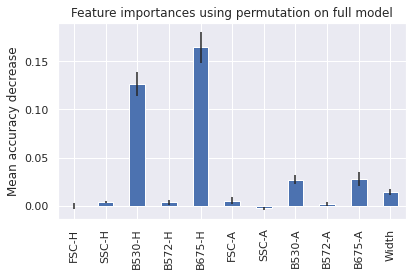

In [32]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## Feature importance
Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.03256766 0.02051611 0.14025702 0.10740204 0.18315925 0.02749997
 0.01647601 0.13534318 0.08275271 0.13939184 0.11463422]


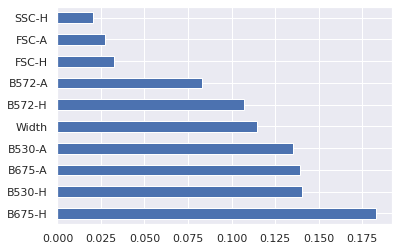

In [34]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Univariate Selection 
Compute the ANOVA F-value for the provided sample.

In [47]:
#Files
file = '../labeled_dataset/GL53_UP_2A.csv'
columns=['FSC-H','SSC-H','B530-H','B572-H','B675-H','FSC-A','SSC-A','B530-A','B572-A','B675-A','Width']
X,y = preprocess(file,columns)
#X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train, X_test, y_train, y_test = proportional_train_test_split(X,y)

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

     Specs       Score
2   B530-H  104.417705
0    FSC-H   92.574883
1    SSC-H   89.237357
7   B530-A   88.833362
5    FSC-A   84.729800
6    SSC-A   79.429339
3   B572-H   73.084614
8   B572-A   68.447097
10   Width   21.358544
4   B675-H    5.277874


In [ ]:
#Log transformation
data_df_plot = data_df.copy()
data_df_plot['FSC-H'] = np.log(data_df['FSC-H'] + 1)
data_df_plot['SSC-H'] = np.log(data_df['SSC-H'] + 1)
data_df_plot['B530-H'] = np.log(data_df['B530-H'] + 1)
data_df_plot['B572-H'] = np.log(data_df['B572-H'] + 1)
data_df_plot['B675-H'] = np.log(data_df['B675-H'] + 1)
data_df_plot['FSC-A'] = np.log(data_df['FSC-A'] + 1)
data_df_plot['SSC-A'] = np.log(data_df['SSC-A'] + 1)
data_df_plot['B530-A'] = np.log(data_df['B530-A'] + 1)
data_df_plot['B572-A'] = np.log(data_df['B572-A'] + 1)
data_df_plot['B675-A'] = np.log(data_df['B675-A'] + 1)
data_df_plot['Width'] = np.log(data_df['Width'] + 1)
data_df_plot['Time'] = np.log(data_df['Time'] + 1)


In [ ]:
# Create a new figure with a width of 12 and a height of 6
plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.histplot(data_df_plot['FSC-H'])
g1.set_title("FSC-H DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.histplot(data_df_plot['SSC-H'],color='green')
g2.set_title('SSC-H DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.histplot(data_df_plot['B530-H'], color='r')
g3.set_title("B530-H DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.histplot(data_df_plot['B572-H'], color='k')
g4.set_title("B572-H  DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.histplot(data_df_plot['B675-H'])
g1.set_title("B675-H DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.histplot(data_df_plot['FSC-A'],color='green')
g2.set_title('FSC-A DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.histplot(data_df_plot['SSC-A'], color='r')
g3.set_title("SSC-A DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.histplot(data_df_plot['B530-A'], color='k')
g4.set_title("B530-A  DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()
plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.histplot(data_df_plot['B572-A'])
g1.set_title("B572-A DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.histplot(data_df_plot['B675-A'],color='green')
g2.set_title('B675-A DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.histplot(data_df_plot['Width'], color='r')
g3.set_title("Width DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.histplot(data_df_plot['Time'], color='k')
g4.set_title("Time  DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

Analyse

In [ ]:
corr_df = data_df[data_df.columns]
cor = corr_df.corr(method='pearson')
print(cor)

In [ ]:
mask = np.triu(np.ones_like(cor, dtype=bool))

fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
hmap = sns.heatmap(cor, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax)
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)
plt.show()

In [ ]:
corr_df = data_df[data_df.columns]
cor = corr_df.corr(method='pearson')
print(cor)

df_visualize = data_df.copy()
fig, ax = plt.subplots(figsize=(15,12)) # create sublots
plt.title("Correlation Heat Map") # set the fig title
mask = np.triu(df_visualize.corr()) # create upper triangle of an array

sns.heatmap(df_visualize.corr(), annot = True, ax=ax, mask=mask, cmap= 'coolwarm', linewidths=.5) # visualize

This plot allows us to see whether some features are strongly correlated among them. For instance, B572-A and B675-A are strongly correlated (0.98), as well as B675-H and B675-A (0.99). These pairs therefore seem to contain redudant information and it would not make sense to select them together

## Features we selected last semester

In [ ]:
#file = '../labeled_dataset/GL55_DN_3A.csv'
columns=['B530-H', 'B530-A', 'B572-H','B572-A', 'B675-H','B675-A','Width']
#X,y = preprocess(file,columns)

In [ ]:
corr_df = data_df[columns]
cor = corr_df.corr(method='pearson')
print(cor)

In [ ]:
mask = np.triu(np.ones_like(cor, dtype=bool))

fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
hmap = sns.heatmap(cor, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax,vmin=0,vmax=1)
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)
plt.show()

## Features freshly selected

In [ ]:
columns=['B530-H', 'B572-H','B675-H','Width']


In [ ]:
corr_df = data_df[columns]
cor = corr_df.corr(method='pearson')
print(cor)

In [ ]:

mask = np.triu(np.ones_like(cor, dtype=bool))

fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
hmap = sns.heatmap(cor, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax,vmin=0,vmax=1)
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)
plt.show()

In [ ]:
sns.scatterplot(data=data_df, x="B530-H", y="B572-H")

In [ ]:
data_df.shape

We can see we have outliers

In [ ]:
data_df_no_outliers = remove_outliers(data_df)

In [ ]:
data_df_no_outliers.shape

In [ ]:
sns.scatterplot(data=data_df_no_outliers, x="B530-H", y="B572-H")

In [ ]:
data_df_no_outliers.describe()